-----------------------------------------------------
## Análise de Estacionariedade

#### Este notebook avalia as propriedades de estacionariedade das séries temporais utilizadas no modelo de demanda de energia, aplicando inspeção visual e testes formais de raiz unitária.
-----------------------------------------------------

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from statsmodels.tsa.stattools import adfuller, kpss
from IPython.display import display


PATH PADRONIZADO

In [27]:
# Diretório raiz do projeto
PROJECT_ROOT = Path("..")

# Diretórios de dados
DATA_INTERIM = PROJECT_ROOT / "data" / "interim"
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

# Diretórios de saída
RESULTS_FIGURES = PROJECT_ROOT / "results" / "figures"
RESULTS_TABLES = PROJECT_ROOT / "results" / "tables"

# Criar diretórios se não existirem
RESULTS_FIGURES.mkdir(parents=True, exist_ok=True)
RESULTS_TABLES.mkdir(parents=True, exist_ok=True)


Lendo os dados da pasta Interim para realizar a análise da estacionariedade da série de dados 

In [28]:
df = pd.read_csv(
    DATA_INTERIM / "base_consolidada_real.csv",
    parse_dates=["date"],
    index_col="date"
)

df.head()


,demanda_energia,importacoes_petroleo,tarifa_energia_real,pib_real
date,,,,
1997-01-01,9455000.0,34.30,467.517793,661414.113517
1997-02-01,9840000.0,40.08,451.042648,603381.980588
1997-03-01,9488000.0,34.76,458.363948,591333.646663
1997-04-01,9945000.0,33.11,458.465453,613852.199952
1997-05-01,10304000.0,34.56,514.909651,649733.762544


In [29]:
series = df[
    [
        "demanda_energia",
        "tarifa_energia_real",
        "pib_real",
        "importacoes_petroleo"
    ]
]

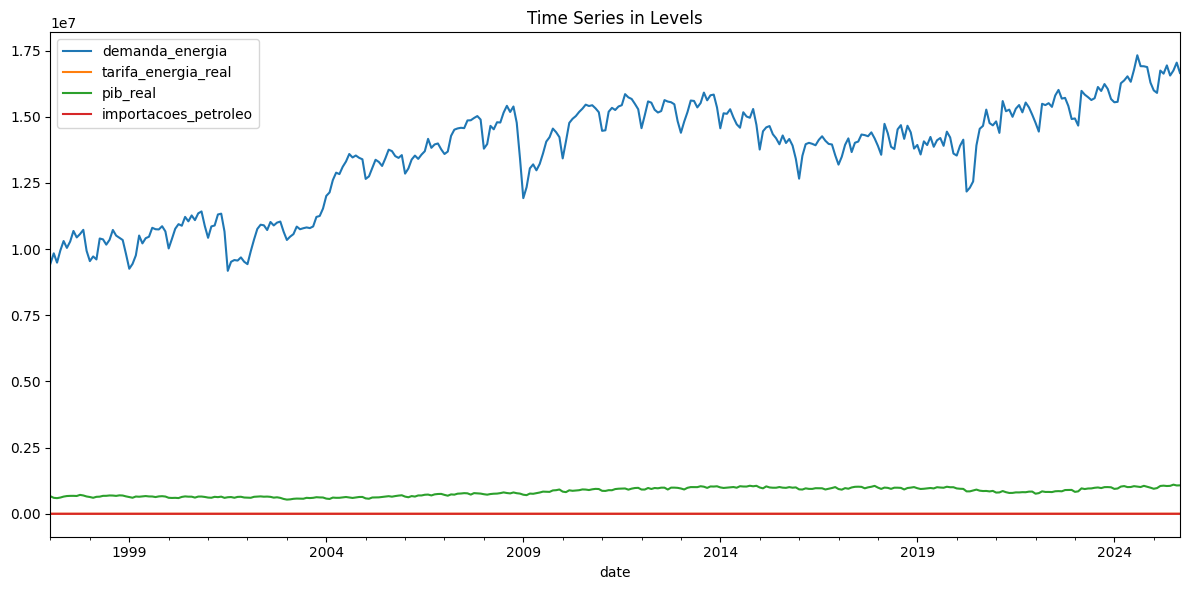

In [36]:
series.plot(
    figsize=(12, 6),
    title="Time Series in Levels"
)

plt.tight_layout()
plt.show()


#### Funções dos Testes ADF e KPSS

In [37]:
def run_stationarity_tests(series, name):
    results = []

    # ADF
    adf_stat, adf_p, _, _, _, _ = adfuller(series.dropna())
    results.append({
        "Variável": name,
        "Teste": "ADF",
        "Estatística": adf_stat,
        "p-valor": adf_p,
        "H0": "Não estacionária" if adf_p > 0.05 else "Estacionária"
    })

    # KPSS
    kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
    results.append({
        "Variável": name,
        "Teste": "KPSS",
        "Estatística": kpss_stat,
        "p-valor": kpss_p,
        "H0": "Estacionária" if kpss_p > 0.05 else "Não estacionária"
    })

    return results



#### Função para montar a tabela final

In [38]:
def build_stationarity_table(df, variables):
    all_results = []

    for var in variables:
        all_results.extend(run_stationarity_tests(df[var], var))

    table = pd.DataFrame(all_results)

    return table.set_index(["Variável", "Teste"])


#### Função para salvar tabela como IMAGEM

In [39]:
def save_table_as_image(df, filename, title):
    fig, ax = plt.subplots(figsize=(14, 4))
    ax.axis("off")

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        rowLabels=df.index,
        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    plt.title(title, pad=20)
    plt.savefig(RESULTS_FIGURES / filename, dpi=300, bbox_inches="tight")
    plt.close()


In [41]:
variables = [
    "demanda_energia",
    "tarifa_energia_real",
    "pib_real",
    "importacoes_petroleo"
]

-------------------------------------------------------
## Testes de Estacionariedade dos dados em nível

#### Hipoótese Nula ADF: a série não é estacionária (tem raiz unitária) - p-valor < 0,05 → rejeita H₀ → estacionária

#### Hipoótese Nula KPSS: a série é estacionária (tem raiz unitária) - p-valor < 0,05 → rejeita H₀ → não estacionária


----------------------------------------------------

In [46]:
table_level = build_stationarity_table(df, variables)

print("📊 Testes de Estacionariedade – Séries em Nível")
display(table_level)

table_level.to_csv(RESULTS_TABLES / "stationarity_level.csv")

save_table_as_image(
    table_level,
    "stationarity_level.png",
    "Testes de Estacionariedade – Séries em Nível"
)


📊 Testes de Estacionariedade – Séries em Nível


C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\

Estatística   p-valor                H0
Variável             Teste                                         
demanda_energia      ADF      -1.224745  0.662862  Não estacionária
                     KPSS      2.179249  0.010000  Não estacionária
tarifa_energia_real  ADF      -2.264917  0.183533  Não estacionária
                     KPSS      1.284165  0.010000  Não estacionária
pib_real             ADF      -1.020061  0.745877  Não estacionária
                     KPSS      2.308252  0.010000  Não estacionária
importacoes_petroleo ADF      -2.183570  0.212263  Não estacionária
                     KPSS      1.331053  0.010000  Não estacionária

--------------------------------------
## Resposta - Em nível nenhuma variável é estacionária

#### Analisar série Logaritimizada e Diferença em Primeiro nível para entender se a série fica estacionária.
---------------------------------------

--------------------------------------
## Testes de Estacionariedade com as variáveis Logaritmizadas
---------------------------------------

In [47]:
df_log = np.log(df[variables])

table_log = build_stationarity_table(df_log, variables)

print("📊 Testes de Estacionariedade – Séries em Log")
display(table_log)

table_log.to_csv(RESULTS_TABLES / "stationarity_log.csv")

save_table_as_image(
    table_log,
    "stationarity_log.png",
    "Testes de Estacionariedade – Séries em Log"
)

📊 Testes de Estacionariedade – Séries em Log


C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\

Estatística   p-valor                H0
Variável             Teste                                         
demanda_energia      ADF      -1.379054  0.592276  Não estacionária
                     KPSS      2.172171  0.010000  Não estacionária
tarifa_energia_real  ADF      -2.272654  0.180939  Não estacionária
                     KPSS      1.333350  0.010000  Não estacionária
pib_real             ADF      -1.034195  0.740589  Não estacionária
                     KPSS      2.332673  0.010000  Não estacionária
importacoes_petroleo ADF      -1.624133  0.470563  Não estacionária
                     KPSS      1.629402  0.010000  Não estacionária

--------------------------------------
## Resposta - Logaritmizadas nenhuma variável é estacionária

#### Analisar série Em primeira Diferença para entender se a série fica estacionária.
---------------------------------------

--------------------------------------
## Testes de Estacionariedade com as variáveis em Primeira Diferença
---------------------------------------

In [48]:
df_diff = df[variables].diff().dropna()

table_diff = build_stationarity_table(df_diff, variables)

print("📊 Testes de Estacionariedade – Primeira Diferença")
display(table_diff)

table_diff.to_csv(RESULTS_TABLES / "stationarity_diff.csv")

save_table_as_image(
    table_diff,
    "stationarity_diff.png",
    "Testes de Estacionariedade – Primeira Diferença"
)

📊 Testes de Estacionariedade – Primeira Diferença


C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\ipykernel_8628\1474530001.py:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series.dropna(), regression="c", nlags="auto")
C:\Users\Almyr Godoy\AppData\Local\Temp\

Estatística       p-valor            H0
Variável             Teste                                         
demanda_energia      ADF      -5.405767  3.294004e-06  Estacionária
                     KPSS      0.085636  1.000000e-01  Estacionária
tarifa_energia_real  ADF      -4.911437  3.313011e-05  Estacionária
                     KPSS      0.035567  1.000000e-01  Estacionária
pib_real             ADF      -3.975665  1.543438e-03  Estacionária
                     KPSS      0.092259  1.000000e-01  Estacionária
importacoes_petroleo ADF     -11.394299  7.927629e-21  Estacionária
                     KPSS      0.067218  1.000000e-01  Estacionária

--------------------------------------
## Resposta - Em Primeira diferenças as variáveis são estacionárias
---------------------------------------